In [55]:
import pandas as pd

train = pd.read_csv('Training-set.csv')
test = pd.read_csv('testing-set.csv')
train_X = train[['a', 'b', 'c']]
train_y = train[['t']]
test_X = test[['a', 'b', 'c']]
test_y = test[['t']]

print("Train set :" + repr(len(train_X)))
print("Test set :" + repr(len(test_X)))

Train set :7000
Test set :1000


In [58]:
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# 未标准化
# 导入sklearn.neighbors模块中KNN类
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', n_jobs=2)
knn.fit(train_X, train_y.values.ravel())
knn.score(test_X, test_y)
y = knn.predict(test_X)

print(knn.score(test_X, test_y))
print(knn.score(train_X, train_y.values.ravel()))
print('精确度:%.5f' % precision_score(y_true=test_y, y_pred=y))
print('召回率:%.5f' % recall_score(y_true=test_y, y_pred=y))
print('F1值:%.5f' % f1_score(y_true=test_y, y_pred=y))

0.769
1.0
精确度:0.82522
召回率:0.71048
F1值:0.76356


In [62]:
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np


# 导入sklearn.neighbors模块中KNN类
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', n_jobs=2)

# 对数据标准化
X_train_X_scaled = preprocessing.scale(train_X)
# y_train_y_scaled = preprocessing.scale(train_y.values.ravel())
X_test_X_scaled = preprocessing.scale(test_X)


knn.fit(X_train_X_scaled, train_y.values.ravel())
knn.score(X_test_X_scaled, test_y)
y = knn.predict(X_test_X_scaled)

print(knn.score(X_test_X_scaled, test_y))
print(knn.score(X_train_X_scaled, train_y.values.ravel()))
print('精确度:%.5f' % precision_score(y_true=test_y, y_pred=y))
print('召回率:%.5f' % recall_score(y_true=test_y, y_pred=y))
print('F1值:%.5f' % f1_score(y_true=test_y, y_pred=y))

0.524
1.0
精确度:0.52457
召回率:0.99619
F1值:0.68725


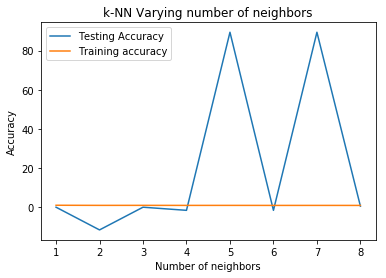

In [60]:
#########################KNN K值选取探索################################
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_X, train_y.values.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_X, train_y.values.ravel())
    
    #Compute accuracy on the test set
test_accuracy[i] = knn.score(test_X, test_y)
 
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [64]:
# 根据上图选取5
# 导入sklearn.neighbors模块中KNN类
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', n_jobs=2)
knn.fit(train_X, train_y.values.ravel())
knn.score(test_X, test_y)
y = knn.predict(test_X)

print(knn.score(test_X, test_y))
print(knn.score(train_X, train_y.values.ravel()))
print('精确度:%.5f' % precision_score(y_true=test_y, y_pred=y))
print('召回率:%.5f' % recall_score(y_true=test_y, y_pred=y))
print('F1值:%.5f' % f1_score(y_true=test_y, y_pred=y))



0.768
1.0
精确度:0.82628
召回率:0.70667
F1值:0.76181
